# Data Preparation and Exploration

## Introduction

이 노트북은 NS 홈쇼핑 대회의 데이터에 대한 의미있는 인사이트를 얻는 것에 목적을 둔다.

## Loading packages

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [44]:
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## Loading data

In [2]:
sales_result_ds = pd.read_excel('./data/sales_result.xlsx')
rating_ds = pd.read_excel('./data/rating.xlsx')

In [3]:
# sales_result_ds column 수정
header = sales_result_ds.iloc[0]
sales_result_ds = sales_result_ds[1:] 
sales_result_ds.rename(columns = header, inplace=True)

# rating_ds column 수정
header = rating_ds.iloc[0]
rating_ds = rating_ds[1:] 
rating_ds.rename(columns = header, inplace=True)

## Data at first sight

In [4]:
sales_result_ds.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
2,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
4,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000


In [5]:
rating_ds.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
1,02:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003
2,02:01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.012,0.003
3,02:02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.004
4,02:03,0,0,0.014,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004
5,02:04,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004


In [6]:
sales_result_ds.shape

(38309, 8)

In [7]:
rating_ds.shape

(1441, 367)

### Simple stats of the Dataset

In [8]:
unique_products = len(sales_result_ds['상품코드'].unique())
unique_products_mother = len(sales_result_ds['마더코드'].unique())

print("total product = ", unique_products)
print("total mother code = ", unique_products_mother)

total product =  2124
total mother code =  716


### Null 값 확인

In [9]:
sales_result_ds.isnull().sum()

방송일시         0
노출(분)    16784
마더코드         0
상품코드         0
상품명          0
상품군          0
판매단가         0
취급액       2930
dtype: int64

Null 값은 "노출(분)"과 "취급액" column에만 존재. __"노출(분)"의 Null 값은 방송되고 있는 상품의 다른 옵션이라고 생각된다. (예를 들어, 남성/여성, 일시불/무이자...)__

In [10]:
sales_result_ds.loc[sales_result_ds.취급액.isnull()]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
145,2019-01-02 22:00:00,NaN,100148,200432,무이자 LG 울트라HD TV 55UK6800HNC,가전,1440000,NaN
148,2019-01-02 22:00:00,NaN,100148,200518,일시불 LG 울트라HD TV 70UK7400KNA,가전,2700000,NaN
149,2019-01-02 22:00:00,NaN,100148,200451,무이자 LG 울트라HD TV 70UK7400KNA,가전,2990000,NaN
154,2019-01-02 22:20:00,NaN,100148,200518,일시불 LG 울트라HD TV 70UK7400KNA,가전,2700000,NaN
155,2019-01-02 22:20:00,NaN,100148,200451,무이자 LG 울트라HD TV 70UK7400KNA,가전,2990000,NaN
...,...,...,...,...,...,...,...,...
38305,2020-01-01 00:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 00:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38308,2020-01-01 01:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


취급액의 Null 값은 추후 분석이 필요할 것 같다.

In [11]:
# 일단 편의를 위해 Null 값을 0으로 채우자
sales_result_ds = sales_result_ds.fillna(0)

In [12]:
rating_ds.isnull().sum()

시간대                         0
2019-01-01                  0
2019-01-02                  0
2019-01-03                  0
2019-01-04                  0
                           ..
2019-12-28                  0
2019-12-29                  0
2019-12-30                  0
2019-12-31                  0
2019-01-01 to 2019-12-31    0
Length: 367, dtype: int64

rating_ds에는 null 값이 존재하지 않는다.

### 데이터 타입 변환하기

In [13]:
sales_result_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 1 to 38309
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   38309 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     38309 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.3+ MB


sales_result_ds에 있는 데이터의 타입이 모두 'object' 이다. 앞으로의 데이터 관리를 용이하게 하기 위해 데이터 타입을 변경하고자 한다.

In [14]:
sales_result_ds = sales_result_ds.astype({'노출(분)':int, '마더코드':int, '상품코드':int, '판매단가':int, '취급액':int})

In [15]:
sales_result_ds['방송일시'] = pd.to_datetime(sales_result_ds['방송일시'], format='%Y-%m-%d %H:%M:%S', errors='raise') # 방송일시 datetime으로 변환

## Metadata

데이터 관리를 위해, DataFrame에 meta 정보를 저장한다.
- role: input, ID, target
- level: nominal, continous, discrete, date
- keep: True or False
- dtype: int, float, str, datetime

In [20]:
data = []
for f in sales_result_ds.columns:
    # role 정의
    if f == '취급액':
        role = 'target'
    elif f == '상품코드':
        role = 'id'
    else:
        role = 'input'
         
    # level 정의
    if f == '방송일시':
        level = 'date'
    elif f == '노출(분)':
        level = 'discrete'
    elif f == '마더코드' or f == '상품코드' or f == '상품명' or f == '상품군':
        level = 'nominal'
    else:
        level = 'continous'
        
    # 상품코드(id)를 제외한 나머지 변수들의 keep를 True로 초기화
    keep = True
    if f == '상품코드':
        keep = False
    
    # data type 정의 
    dtype = sales_result_ds[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [21]:
meta

,role,level,keep,dtype
varname,,,,
방송일시,input,date,True,datetime64[ns]
노출(분),input,discrete,True,int64
마더코드,input,nominal,True,int64
상품코드,id,nominal,False,int64
상품명,input,nominal,True,object
상품군,input,nominal,True,object
판매단가,input,continous,True,int64
취급액,target,continous,True,int64


## Analyzing The Features

### 노출(분)

In [30]:
sales_result_ds['노출(분)'].unique()

array([20,  0, 30, 17, 27, 16, 26, 60, 12, 15,  2, 25, 14, 24, 22, 10, 13,
       23,  3,  5,  8, 19,  7, 18,  6, 11, 29,  9, 40])

In [51]:
sales_result_ds['노출(분)'].value_counts()

20    19061
0     16784
30     1163
10      763
15      189
16      122
17       61
60       48
13       48
14       12
25        6
26        6
12        6
3         5
23        5
5         5
6         5
11        3
22        3
18        3
19        2
2         2
9         1
40        1
8         1
7         1
29        1
24        1
27        1
Name: 노출(분), dtype: int64

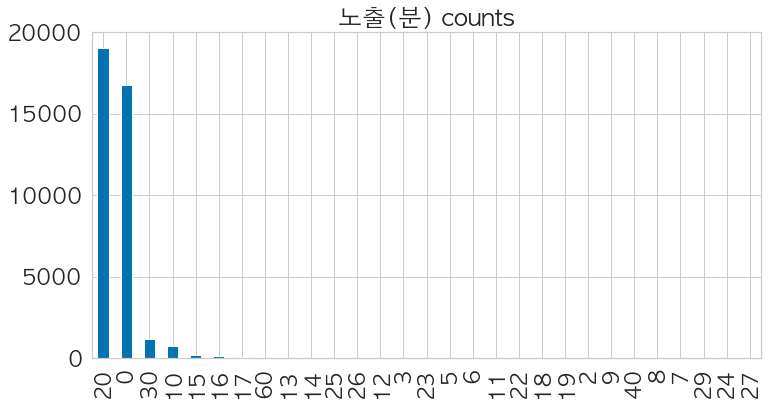

In [46]:
sales_result_ds['노출(분)'].value_counts().plot(kind = 'bar', figsize = (12,6), title = '노출(분) counts')
plt.show()

In [59]:
print("가장 긴 노출(분): ", sales_result_ds['노출(분)'].max())

가장 긴 노출(분):  60


- 20분 편성이 가장 많고, 0분을 제외하고 30분, 10분 순으로 많다.
- 가장 긴 노출 시간은 60분이다.